# **Cyberbullying Attack Classification**

## **Problem Statement**

We are having a dataset containg the tweets on twitter and its classification as cyberbullying attack type.
We are required to use NLP to preprocess the data and build a ML model which can perform on these dataset to classify the target variables with high accuracy.

### **Importing libraries and loading data**

In [114]:
#Imporrting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#Loading dataset
df = pd.read_csv("/content/cyberbullying_tweets.csv")

In [116]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [117]:
df['tweet_text'].iloc[47000]

'Call me disgusting then! Because if any non BLACK person, especially a white one, calls me a nigger I’m going to slap the dogshit out of them too...it’s a new day for the Karens around the world.'

In [118]:
df.shape

(47692, 2)

In [119]:
#checking null values
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [120]:
# checking duplicate entries
df.duplicated().sum()

36

In [121]:
df = df[~df.duplicated()]

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [123]:
df['cyberbullying_type'].value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

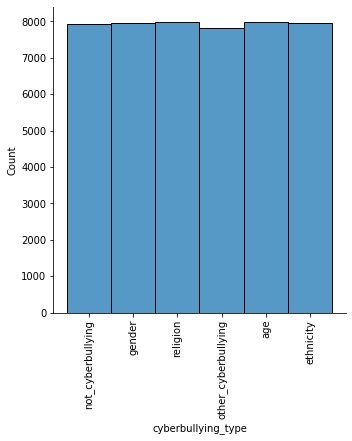

In [124]:
#distribution of target variable
sns.displot(data=df,x='cyberbullying_type')
plt.xticks(rotation=90)

So we have a very much balanced data.

## **Removing punctuations**

## **Funtion to remove punctuation**

In [125]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [126]:
# looking at the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## **Apply the function to each examples**

In [127]:
#applying function to remove punctuations
df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)
df.head(10)

,tweet_text,cyberbullying_type
0,In other words katandandre your food was crapi...,not_cyberbullying
1,Why is aussietv so white MKR theblock ImACeleb...,not_cyberbullying
2,XochitlSuckkks a classy whore Or more red velv...,not_cyberbullying
3,JasonGio meh P thanks for the heads up but no...,not_cyberbullying
4,RudhoeEnglish This is an ISIS account pretendi...,not_cyberbullying
5,Raja5aab Quickieleaks Yes the test of god is t...,not_cyberbullying
6,Itu sekolah ya bukan tempat bully Ga jauh kaya...,not_cyberbullying
7,Karma I hope it bites Kat on the butt She is j...,not_cyberbullying
8,stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bullying,not_cyberbullying


In [128]:
df['tweet_text'].iloc[29966]

'SERIOUSLY not ANOTHER instant restaurant round 😡 MKR'

###**Cleaning emojis from text**

In [129]:
# Function to Clean emjois from text
import re
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [130]:
# applying the function to clean emjois
df['tweet_text'] = df['tweet_text'].apply(remove_emojis)

In [131]:
df['tweet_text'].iloc[29966]

'SERIOUSLY not ANOTHER instant restaurant round  MKR'

**Emoji cleaned**

## **Removing stopwords**

**Extract the stop words**

In [132]:
#downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
# extracting the stopwords from nltk library
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [134]:
elem_remove = ['no', 'nor', 'not',"aren't", 'couldn',
       "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
       'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
       'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
       'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
       'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
for elem in elem_remove:
 sw.remove(elem)

In [135]:
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

## **Function to remove stopwords**

In [136]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [137]:
#applying function to remove stopwords
df['tweet_text'] = df['tweet_text'].apply(stopwords)
df.head(10)

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,xochitlsuckkks classy whore red velvet cupcakes,not_cyberbullying
3,jasongio meh p thanks heads not concerned anot...,not_cyberbullying
4,rudhoeenglish isis account pretending kurdish ...,not_cyberbullying
5,raja5aab quickieleaks yes test god good bad in...,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya...,not_cyberbullying
7,karma hope bites kat butt nasty mkr,not_cyberbullying
8,stockputout everything mostly priest,not_cyberbullying
9,rebecca black drops school due bullying,not_cyberbullying


In [138]:
df['tweet_text'].iloc[29966]

'seriously not another instant restaurant round mkr'

### **More cleaning**

In [139]:
#creating function to make it more cleaner
def clean(text): 
    text = text.replace('\r', '').replace('\n', ' ') #remove \n and \r
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = re.sub(r"((www.[^s]+)|(http\S+))","",text) #remove urls
    text = re.sub('[0-9]+', '', text) #removing numeric data
    text = [word for word in text.split() if len(word)< 14 ] # remove words longer than 14 characters
    text = " ".join(text)
    return text

In [140]:
# applying the cleaning function
df['tweet_text'] = df['tweet_text'].apply(clean)
df.head(10)

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock today sunrise stud...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,jasongio meh p thanks heads not concerned anot...,not_cyberbullying
4,rudhoeenglish isis account pretending kurdish ...,not_cyberbullying
5,rajaaab quickieleaks yes test god good bad ind...,not_cyberbullying
6,itu sekolah ya bukan tempat bully ga jauh kaya...,not_cyberbullying
7,karma hope bites kat butt nasty mkr,not_cyberbullying
8,stockputout everything mostly priest,not_cyberbullying
9,rebecca black drops school due bullying,not_cyberbullying


### **Removing contractions**

In [141]:
#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [142]:
#applying contraction function
df['tweet_text'] = df['tweet_text'].apply(decontract)

In [143]:
# cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

In [144]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_repeating_characters(x))

### **Tockenization**

In [145]:
# Tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
df['tweet_text'] = df['tweet_text'].apply(tokenizer.tokenize)

In [146]:
df['tweet_text'][100]

['mirebotan',
 'ramiallolah',
 'support',
 'dont',
 'like',
 'people',
 'like',
 'rami',
 'complain',
 'things',
 'supports',
 'done',
 'others']

### **Stemming**

In [147]:
# stemming
import nltk
st = nltk.PorterStemmer()

def text_stemming(text):
    text = [st.stem(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_stemming(x))

In [148]:
df['tweet_text'][100]

['mirebotan',
 'ramiallolah',
 'support',
 'dont',
 'like',
 'peopl',
 'like',
 'rami',
 'complain',
 'thing',
 'support',
 'done',
 'other']

### **Lemmatization**

In [149]:
# lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_lemmatization(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [150]:
df['tweet_text'].head()

0             [word, katandandr, food, crapilici, mkr]
1    [aussietv, white, mkr, theblock, today, sunris...
2                 [classi, whore, red, velvet, cupcak]
3    [jasongio, meh, p, thank, head, not, concern, ...
4    [rudhoeenglish, isi, account, pretend, kurdish...
Name: tweet_text, dtype: object

## **Plotting the most occured words in case of cyberbullying**

In [151]:
# creating dataframe excluding not_cyberbullying
new_df = df.copy()
new_df = new_df[new_df['cyberbullying_type'] != 'not_cyberbullying']
word_df = new_df['tweet_text'].apply(lambda x: " ".join(x))
word_df.head()

7945    rape realzvasiyana nema joke drunk gay lesbian...
7946    never saw celebr say anyth like obama b maher ...
7947           mean he gay use gender slur make rape joke
7948                rt raulnovoa alexaim mecaesm feminazi
7949    rape rape fact read one post guy get rape comm...
Name: tweet_text, dtype: object

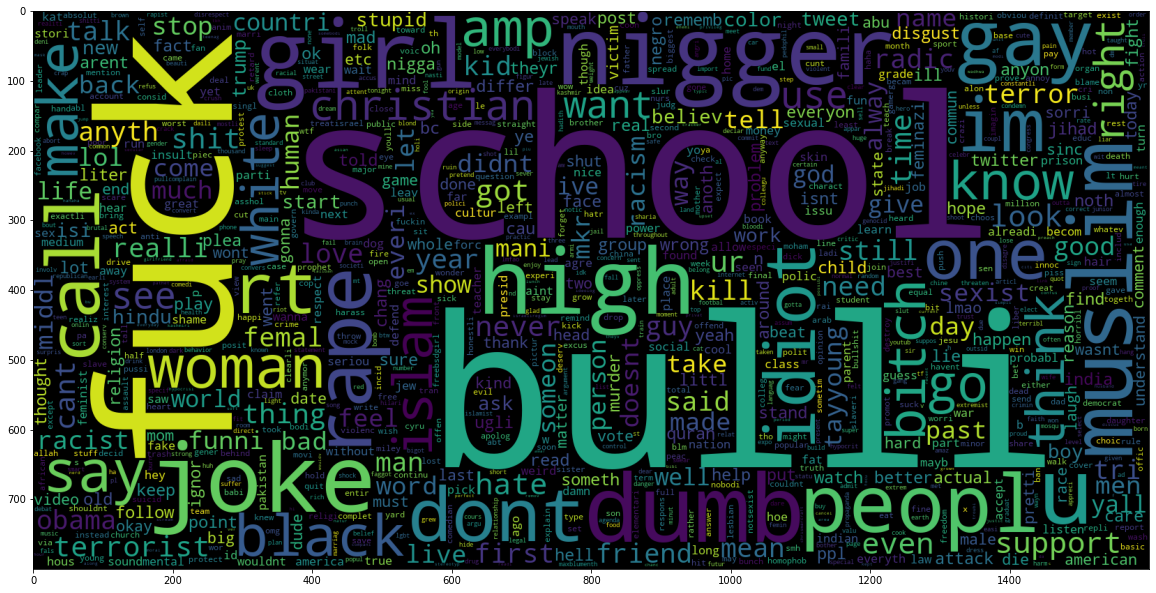

In [45]:
#plotting word cloud
from wordcloud import WordCloud
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(word_df))
plt.imshow(wc)

In [152]:
#original data
df['tweet_text'] = df['tweet_text'].apply(lambda x : " ".join(x))
df.head()

,tweet_text,cyberbullying_type
0,word katandandr food crapilici mkr,not_cyberbullying
1,aussietv white mkr theblock today sunris studi...,not_cyberbullying
2,classi whore red velvet cupcak,not_cyberbullying
3,jasongio meh p thank head not concern anoth an...,not_cyberbullying
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying


**Again check for duplicate entries**

In [153]:
df.duplicated().sum()

780

In [154]:
df = df[~df.duplicated()]

In [155]:
df.duplicated().sum()

0

In [156]:
df['cyberbullying_type'].value_counts()

religion               7953
age                    7895
ethnicity              7834
not_cyberbullying      7803
gender                 7740
other_cyberbullying    7651
Name: cyberbullying_type, dtype: int64

### **Label encoding for target variable**

In [157]:
#creating a sentiment feature(copy of cyberbullying_type )
df['sentiment'] = df['cyberbullying_type']

In [159]:
#label encoding the target variable
df['cyberbullying_type'] = df['cyberbullying_type'].replace({'not_cyberbullying':0,'religion':1,'age':2,'gender':3,'ethnicity':4,'other_cyberbullying':5})

In [160]:
df.head()

,tweet_text,cyberbullying_type,sentiment
0,word katandandr food crapilici mkr,0,not_cyberbullying
1,aussietv white mkr theblock today sunris studi...,0,not_cyberbullying
2,classi whore red velvet cupcak,0,not_cyberbullying
3,jasongio meh p thank head not concern anoth an...,0,not_cyberbullying
4,rudhoeenglish isi account pretend kurdish acco...,0,not_cyberbullying


In [161]:
df['cyberbullying_type'].value_counts()

1    7953
2    7895
4    7834
0    7803
3    7740
5    7651
Name: cyberbullying_type, dtype: int64

### **Creating dummy variables for the text to convert it to numeric**

In [107]:
# applying countvectorizer and TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(df['tweet_text'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [108]:
X_tf

<46876x44700 sparse matrix of type '<class 'numpy.float64'>'
	with 602387 stored elements in Compressed Sparse Row format>

### **Train-Test Split**

In [109]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['cyberbullying_type'], test_size=0.20, stratify=df['cyberbullying_type'], random_state=10)

## **Model Selection**

For the multiclass classification the best suited ML models are:

**1. Naive Bayes**

**2. K Nearest Neighbor**

**3. Random Forest**

We will fit the all model one by one and compare the result to get best model.

## **Model Fitting and evaluation**

### **1. Naive Bayes**

In [110]:
#Fitting the model
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB()

In [172]:
#Evaluating the model
print("Evaluation of Naive Bayes model\n\n")
y_pred_nb = nb_clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred_nb)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred_nb)
print(f"Accuracy:{round(result2,2)}\n\n")

Evaluation of Naive Bayes model


Confusion Matrix:
[[ 512  206  315  119   70  339]
 [   8 1555   11    9    7    1]
 [   1   11 1559    2    5    1]
 [  72   36   48 1332   32   28]
 [   3   55   88   10 1403    8]
 [ 151  105  263  153  148  710]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.33      0.44      1561
           1       0.79      0.98      0.87      1591
           2       0.68      0.99      0.81      1579
           3       0.82      0.86      0.84      1548
           4       0.84      0.90      0.87      1567
           5       0.65      0.46      0.54      1530

    accuracy                           0.75      9376
   macro avg       0.75      0.75      0.73      9376
weighted avg       0.75      0.75      0.73      9376

Accuracy:0.75




### **2. K Nearest Neighbor**



In [111]:
#Fitting the model
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [178]:
#Evaluating the model
print("Evaluation of K Nearest Neighbor model\n\n")
y_pred_knn = knn_clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred_knn)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred_knn)
print(f"Accuracy:{round(result2,2)}\n\n")

Evaluation of K Nearest Neighbor model


Confusion Matrix:
[[956  11   3  19   3 569]
 [989  81   0   2   0 519]
 [941   0 136   0   1 501]
 [846   0   1 219   6 476]
 [806   0   1   0 346 414]
 [954   0   3  20   5 548]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.61      0.27      1561
           1       0.88      0.05      0.10      1591
           2       0.94      0.09      0.16      1579
           3       0.84      0.14      0.24      1548
           4       0.96      0.22      0.36      1567
           5       0.18      0.36      0.24      1530

    accuracy                           0.24      9376
   macro avg       0.66      0.24      0.23      9376
weighted avg       0.67      0.24      0.23      9376

Accuracy:0.24




### **3. Random Forest**

In [112]:
#Fitting the model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [176]:
#Evaluating the model
print("Evaluation of Random Forest model\n\n")
y_pred_rf = rf_clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{result}")
result1 = classification_report(y_test, y_pred_rf)
print(f"Classification Report:\n{result1}")
result2 = accuracy_score(y_test,y_pred_rf)
print(f"Accuracy:{round(result2,2)}\n\n")

Evaluation of Random Forest model


Confusion Matrix:
[[ 763   63   31   59    8  637]
 [  30 1521    0    6    0   34]
 [  18    1 1551    1    0    8]
 [ 111    5    5 1301    5  121]
 [   4    9    3    2 1533   16]
 [ 414    9   24   84   12  987]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      1561
           1       0.95      0.96      0.95      1591
           2       0.96      0.98      0.97      1579
           3       0.90      0.84      0.87      1548
           4       0.98      0.98      0.98      1567
           5       0.55      0.65      0.59      1530

    accuracy                           0.82      9376
   macro avg       0.82      0.82      0.81      9376
weighted avg       0.82      0.82      0.82      9376

Accuracy:0.82




## **Conclusion:**

So the **best model** having best precision, recall and f1-score along with an overall accuracy of 82% is **Random Forest classifier**.